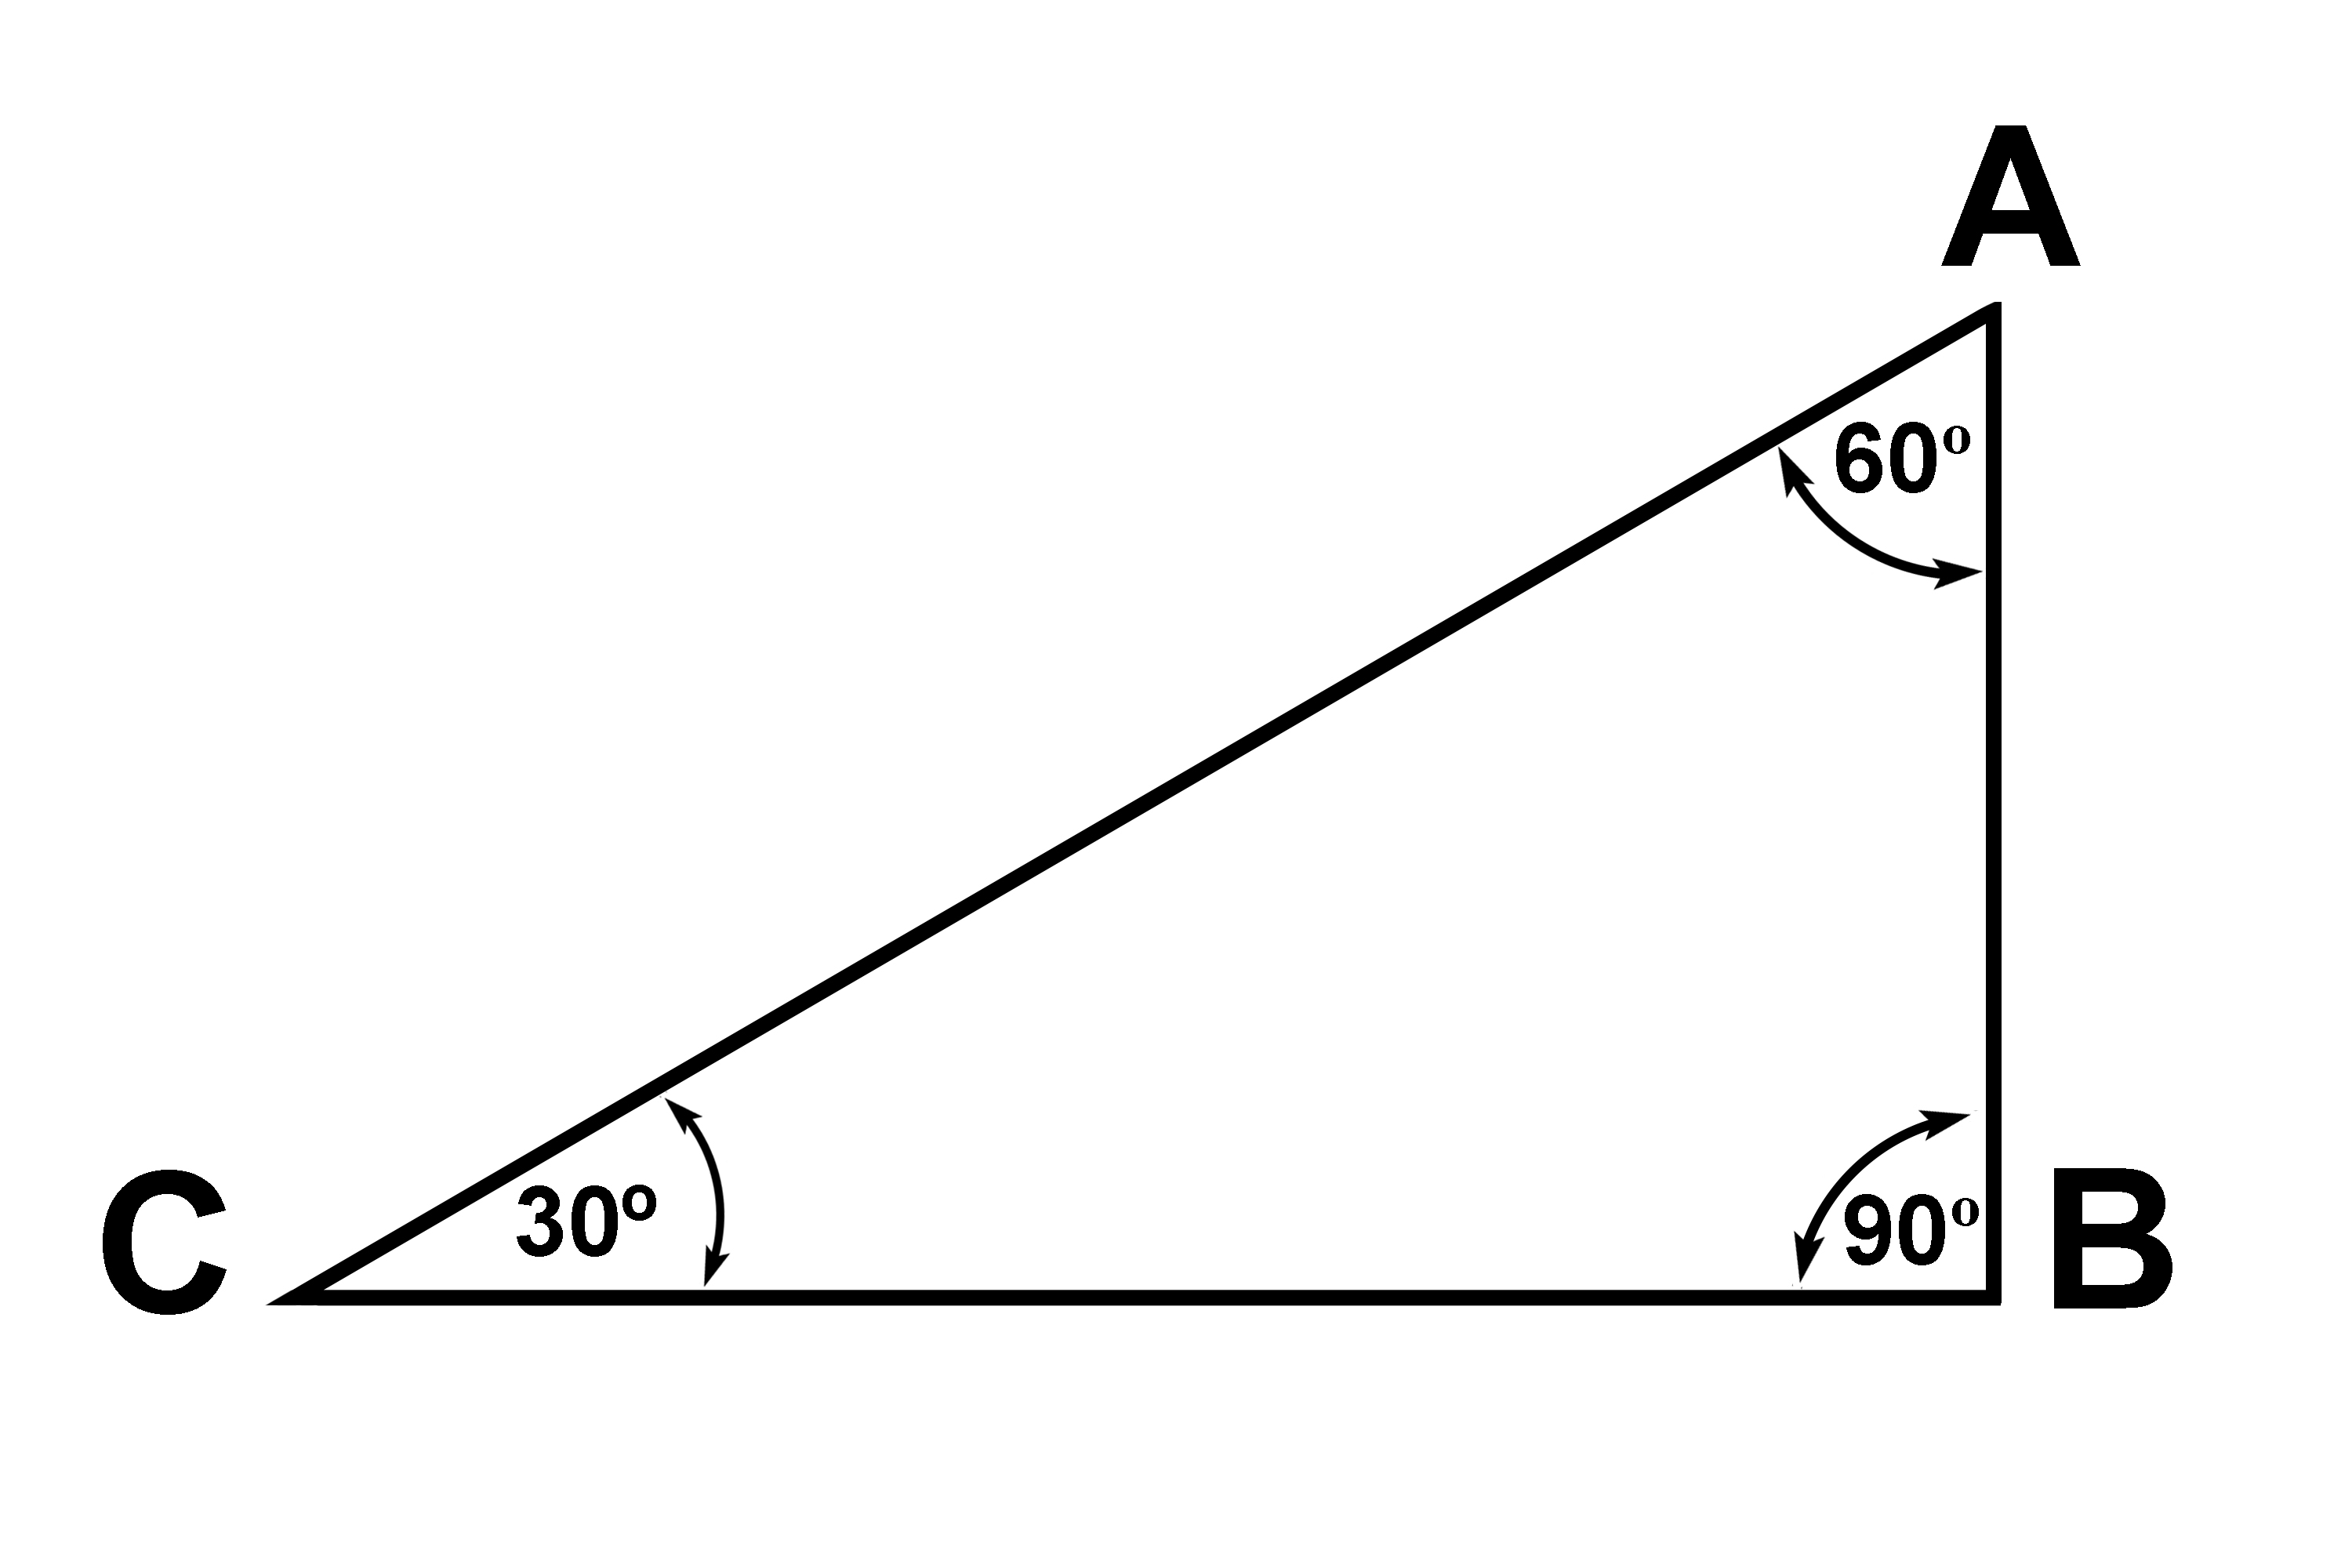

BadRequestError: Error code: 400 - {'error': {'message': 'Failed to download image from example-1-of-a-triangles-internal-angles.ccf9363.jpg. Image URL is invalid.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_image_url'}}

In [16]:
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image, display
import base64

load_dotenv()
client = OpenAI()

image_path = 'utils/example-1-of-a-triangles-internal-angles.ccf9363.jpg'
display(Image(image_path, width=800))

def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        image_binary_data = image_file.read()
        return base64.b64encode(image_binary_data).decode("utf-8")

base64_image = encode_image(image_path)
system_message = 'You are a math tutor'
prompt = 'What is sum of these angles?'

response = client.chat.completions.create(
    model='gpt-4o',
    messages=[
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': [
            {'type': 'text', 'text': prompt},
            {'type': 'image_url', 'image_url':{
                'url': f'utils/example-1-of-a-triangles-internal-angles.ccf9363.jpg;base64,{base64_image}'
            }}
        ]}
    ],
    temperature=0.0
)

print(response.choices[0].message.content)
